# Download the data

In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Take a Quick Look at the Data Structure

- Head
- Info
- Describe
- Histogram on numerical features

In [7]:
# Your code
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f37d588>,
      dtype=object)

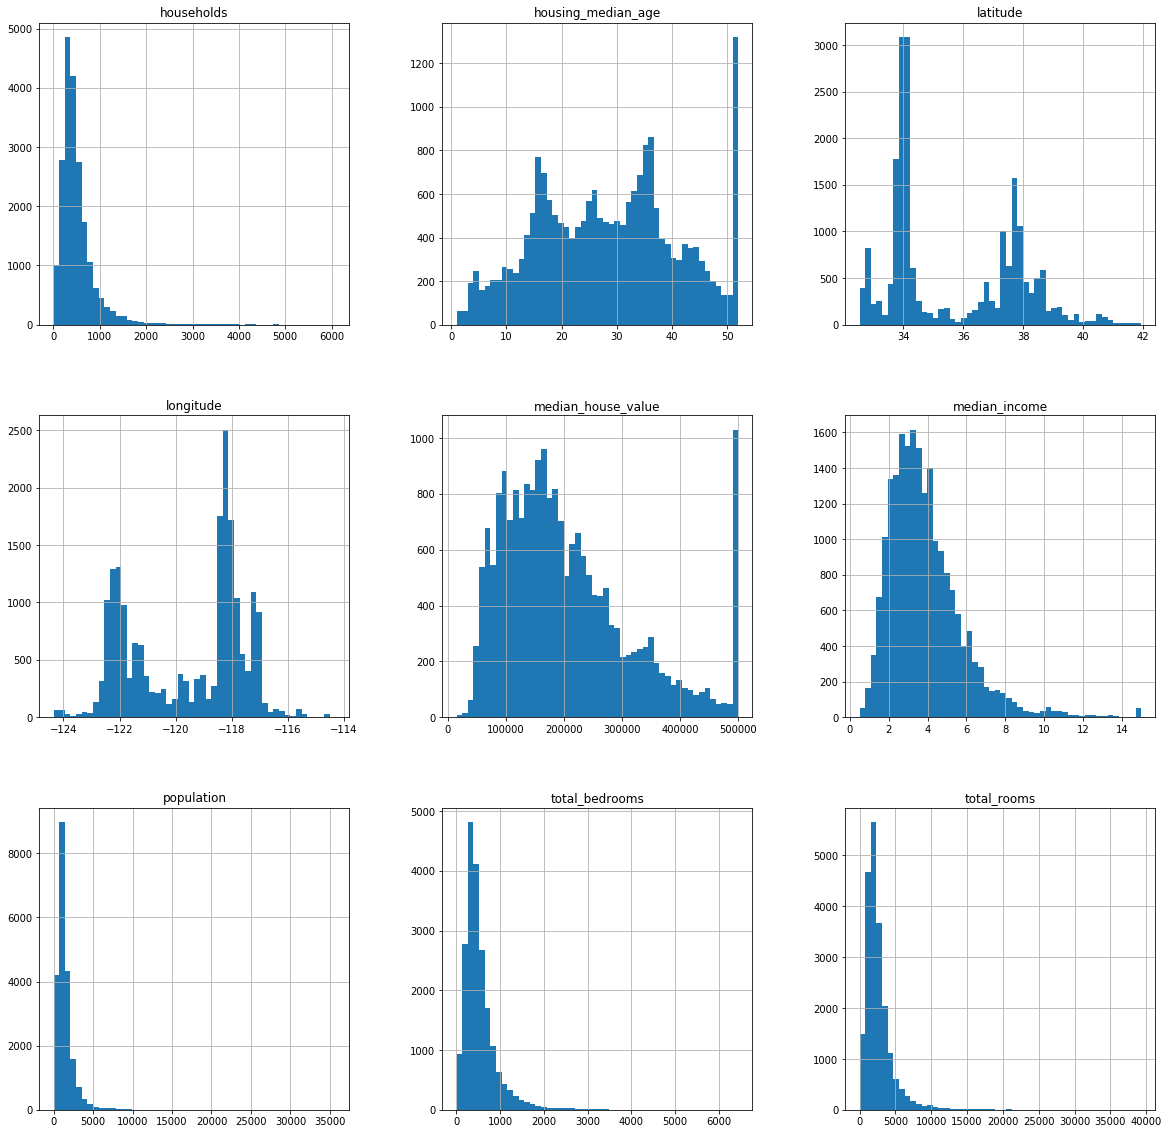

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize = (20,20))

In [11]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

# Create a Test Set

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

In [12]:
# Your code
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2)

In [13]:
test_set.shape

(4128, 10)

In [14]:
train_set.shape

(16512, 10)

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

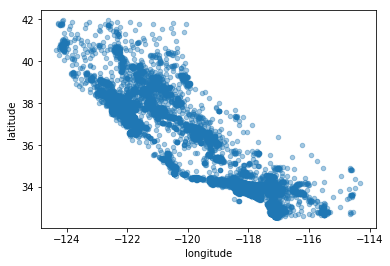

In [15]:
# Your code
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4)

### Plotting points on a real map:

Easy Steps To Plot Geographic Data on a Map — Python:
https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

Export | OpenStreetMap
https://www.openstreetmap.org/export#map=6/37.405/-119.509

In [16]:
# Get the latitude and longitude end points to extract the map from the link above:
BBox = ((housing.longitude.min(), housing.longitude.max(), housing.latitude.min(), housing.latitude.max()))
BBox

(-124.35, -114.31, 32.54, 41.95)

In [17]:
map_= plt.imread('../california.png')

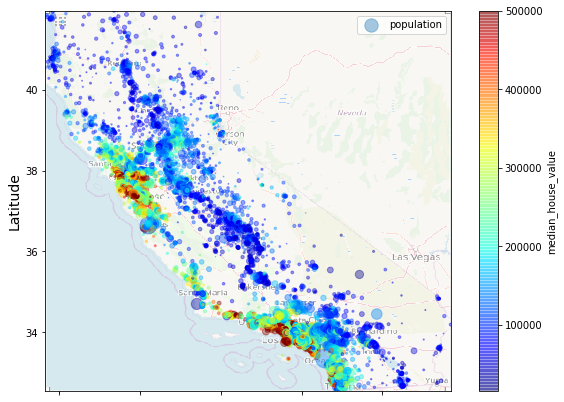

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,s=housing['population']/100, 
          label='population', figsize=(10,7),c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(map_, extent=[-124.35, -114.31, 32.54, 41.95], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend()
plt.show()

## Looking for Correlations

In [19]:
# Your code
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [93]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

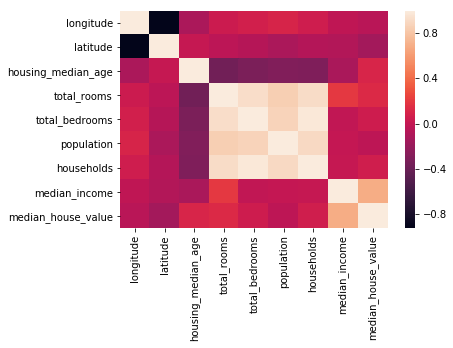

In [94]:
import seaborn as sns
sns.heatmap(housing.corr())

## Experimenting with Feature Engineering

Try to think of new features more useful than some that already exist. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. 

In [20]:
# Your code
housing['rooms_per_household']= housing.total_rooms/housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms/housing.total_rooms
housing['population_per_household'] = housing.population/housing.households

In [21]:
# Check the correlation with the new features
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Data Preparation

## Variable Encoding

In [22]:
#Your code
housing_ocean = pd.get_dummies(housing.ocean_proximity)

In [23]:
housing_ocean.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


## Data Cleaning (missing values handling)

In [13]:
# Check a class called Imputer in Scikit Learn with parameter "median"


In [14]:
# Your code


## Feature engineering

In [15]:
# Add the features that you discovered before

In [16]:
# Your code

## Feature Scaling

In [17]:
# Check StandardScaler in Scikit Learn

In [18]:
# your code

# Select and Train a Model

## Training and Evaluating on the Training Set

Try :
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
(check Scikit Learn)


With Performance Metric = RMSE

## Model Evaluation Using Cross-Validation

Check from sklearn.model_selection import cross_val_score